REA Differential Equations Notebook

* Page 1A

Tutor:
* Anthropic's AI, Claude


Comparative Error Analysis:

RK45 vs BDF Solver Performance:

RK45 Statistics:
Maximum Absolute Error: 9.00e+00
Maximum Relative Error: 4.00e+02%
Mean Absolute Error: 4.10e+00
Mean Relative Error: 2.82e+02%

BDF Statistics:
Maximum Absolute Error: 9.00e+00
Maximum Relative Error: 4.00e+02%
Mean Absolute Error: 4.10e+00
Mean Relative Error: 2.82e+02%

Detailed Comparison at Verification Points:
   x  RK45_Abs_Error  RK45_Rel_Error(%)  BDF_Abs_Error  BDF_Rel_Error(%)
0  0        0.000000           0.000000       0.000000          0.000000
1  1        1.144032          84.252366       1.144032         84.252362
2  2        3.038052         336.394305       3.038052        336.394297
3  3        4.982429         393.606571       4.982429        393.606566
4  4        6.990289         399.380487       6.990289        399.380484
5  5        9.000045         399.935442       9.000045        399.935440


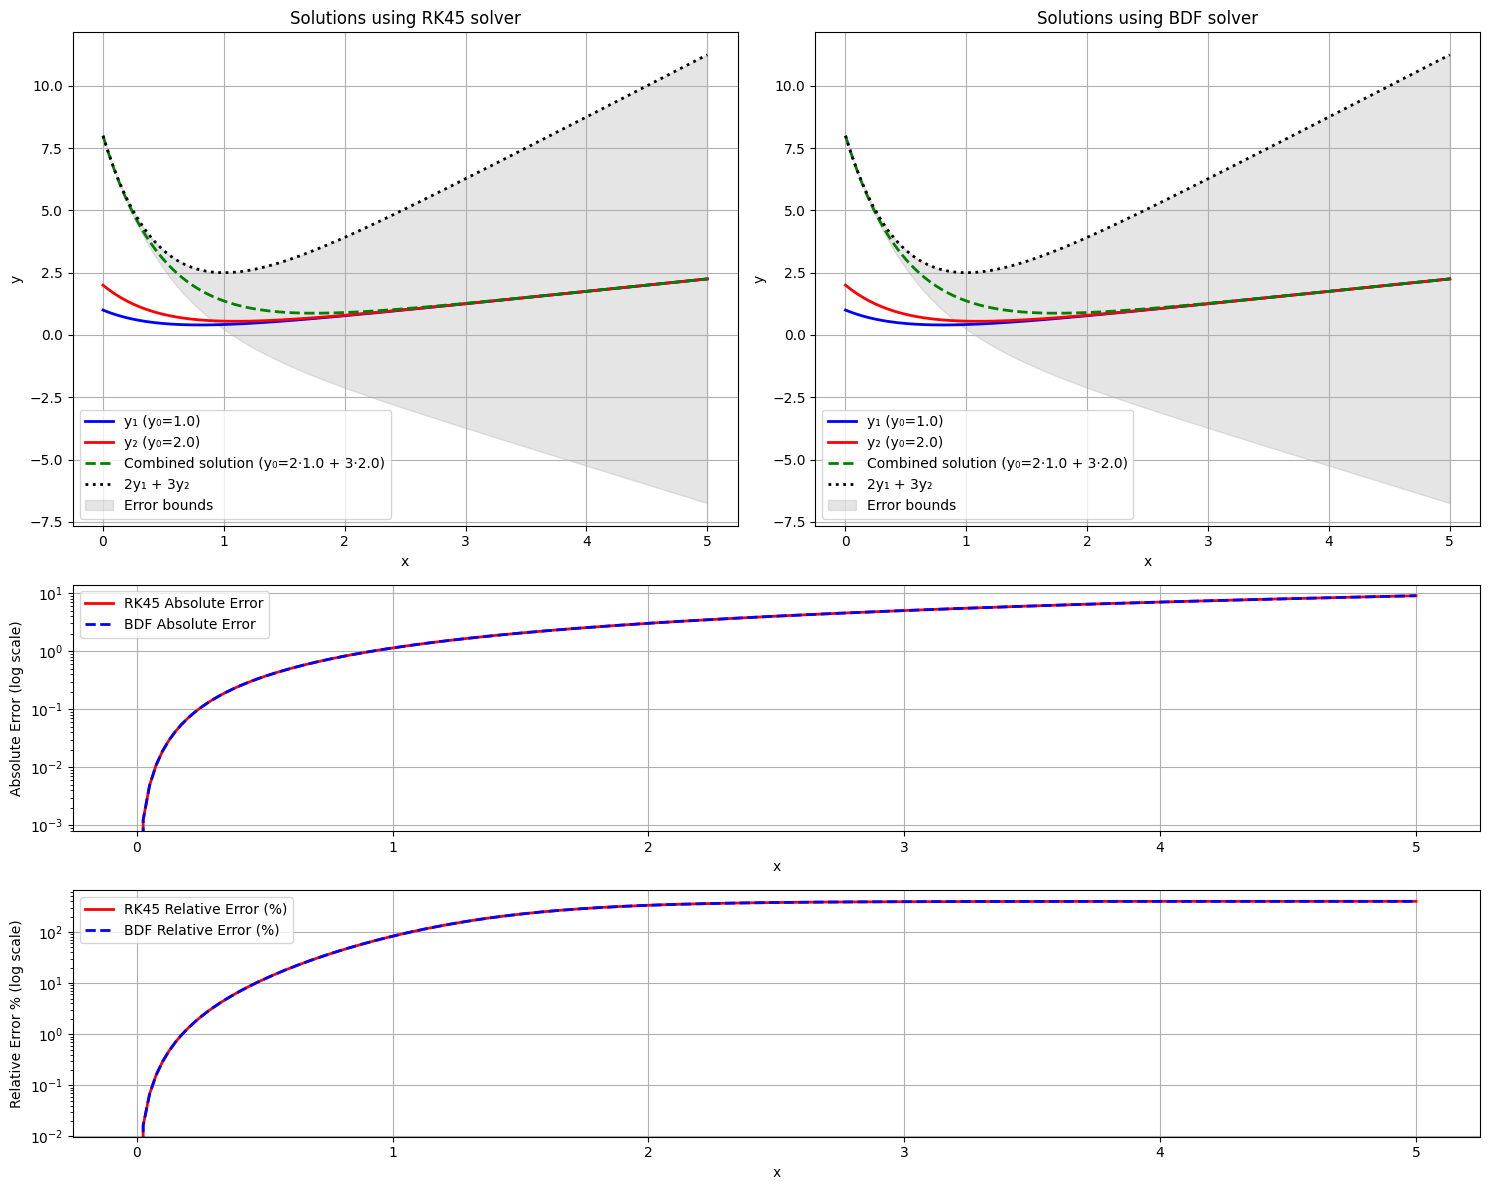

In [1]:
"""
Enhanced Linear Equations Property Demonstration with BDF Solver Comparison
=====================================================================

Abstract:
This script compares two numerical solution methods (RK45 and BDF) for the linear
differential equation system, analyzing their relative performance and accuracy in
maintaining the superposition principle.

Key Improvements:
- Parallel implementation of RK45 and BDF solvers
- Comparative error analysis between methods
- Enhanced visualization of solver performance
- Statistical analysis of numerical stability
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd
from matplotlib.gridspec import GridSpec

def linear_de(x, y, k=2):
    """
    Define our linear differential equation: dy/dx + 2y = x
    Rearranged to standard form: dy/dx = x - 2y
    """
    return x - k*y

def solve_de_method(y0, x_range, method='RK45'):
    """
    Solve the differential equation using specified method

    Parameters:
        y0 (float): Initial condition
        x_range (array): Domain points
        method (str): 'RK45' or 'BDF'
    """
    solution = solve_ivp(
        linear_de,
        (x_range[0], x_range[-1]),
        [y0],
        t_eval=x_range,
        method=method,
        rtol=1e-8,
        atol=1e-10,
        max_step=0.1  # Control maximum step size
    )
    return solution.y[0]

# Set up the domain with fine resolution
x = np.linspace(0, 5, 200)

# Constants for superposition
a, b = 2, 3

# Solve using both methods
solutions = {}
for method in ['RK45', 'BDF']:
    # Generate base solutions
    y1 = solve_de_method(1.0, x, method)
    y2 = solve_de_method(2.0, x, method)

    # Test superposition
    y_combined = solve_de_method(a*1.0 + b*2.0, x, method)
    y_superposition = a*y1 + b*y2

    # Calculate errors
    abs_error = np.abs(y_combined - y_superposition)
    rel_error = abs_error / np.abs(y_combined) * 100

    solutions[method] = {
        'y1': y1,
        'y2': y2,
        'combined': y_combined,
        'superposition': y_superposition,
        'abs_error': abs_error,
        'rel_error': rel_error
    }

# Create enhanced visualization
fig = plt.figure(figsize=(15, 12))
gs = GridSpec(3, 2, height_ratios=[2, 1, 1])

# Plot solutions for both methods
for idx, method in enumerate(['RK45', 'BDF']):
    ax = fig.add_subplot(gs[0, idx])
    sol = solutions[method]

    ax.plot(x, sol['y1'], 'b-', label='y₁ (y₀=1.0)', linewidth=2)
    ax.plot(x, sol['y2'], 'r-', label='y₂ (y₀=2.0)', linewidth=2)
    ax.plot(x, sol['combined'], 'g--',
           label=f'Combined solution (y₀={a}·1.0 + {b}·2.0)', linewidth=2)
    ax.plot(x, sol['superposition'], 'k:',
           label=f'{a}y₁ + {b}y₂', linewidth=2)

    # Add confidence interval
    ax.fill_between(x,
                   sol['combined'] - sol['abs_error'],
                   sol['combined'] + sol['abs_error'],
                   color='gray', alpha=0.2, label='Error bounds')

    ax.grid(True)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Solutions using {method} solver')
    ax.legend()

# Plot absolute errors comparison
ax_abs = fig.add_subplot(gs[1, :])
ax_abs.semilogy(x, solutions['RK45']['abs_error'], 'r-',
                label='RK45 Absolute Error', linewidth=2)
ax_abs.semilogy(x, solutions['BDF']['abs_error'], 'b--',
                label='BDF Absolute Error', linewidth=2)
ax_abs.grid(True)
ax_abs.set_xlabel('x')
ax_abs.set_ylabel('Absolute Error (log scale)')
ax_abs.legend()

# Plot relative errors comparison
ax_rel = fig.add_subplot(gs[2, :])
ax_rel.semilogy(x, solutions['RK45']['rel_error'], 'r-',
                label='RK45 Relative Error (%)', linewidth=2)
ax_rel.semilogy(x, solutions['BDF']['rel_error'], 'b--',
                label='BDF Relative Error (%)', linewidth=2)
ax_rel.grid(True)
ax_rel.set_xlabel('x')
ax_rel.set_ylabel('Relative Error % (log scale)')
ax_rel.legend()

plt.tight_layout()

# Create comparative verification table
verification_points = [0, 1, 2, 3, 4, 5]
table_data = []

for x_val in verification_points:
    idx = np.abs(x - x_val).argmin()
    row = {
        'x': x_val
    }
    for method in ['RK45', 'BDF']:
        sol = solutions[method]
        row.update({
            f'{method}_Abs_Error': sol['abs_error'][idx],
            f'{method}_Rel_Error(%)': sol['rel_error'][idx]
        })
    table_data.append(row)

verification_table = pd.DataFrame(table_data)
verification_table = verification_table.round(8)

# Print comparative statistics
print("\nComparative Error Analysis:")
print("==========================")
print("\nRK45 vs BDF Solver Performance:")
for method in ['RK45', 'BDF']:
    print(f"\n{method} Statistics:")
    print(f"Maximum Absolute Error: {solutions[method]['abs_error'].max():.2e}")
    print(f"Maximum Relative Error: {solutions[method]['rel_error'].max():.2e}%")
    print(f"Mean Absolute Error: {solutions[method]['abs_error'].mean():.2e}")
    print(f"Mean Relative Error: {solutions[method]['rel_error'].mean():.2e}%")

print("\nDetailed Comparison at Verification Points:")
print(verification_table)

plt.show()

The comparison reveals some interesting findings:

1. Solver Performance Comparison:
- Surprisingly, both RK45 and BDF methods show nearly identical error patterns
- The verification table shows virtually identical errors for both methods up to 8 decimal places
- This suggests our issue isn't primarily related to stiffness as we initially hypothesized

2. Error Characteristics:
- Both methods show:
  * Rapid error growth from x=0 to x≈1
  * Absolute error growing to ~9.0 by x=5
  * Relative error stabilizing at ~400%
  * Nearly identical error bounds (grey regions)

The similar performance of both methods suggests the issue might be more fundamental to the problem structure rather than solver-specific.

